In [1]:
import pandas as pd
path_to_file = 'c:\\Users\\Admin\\Desktop\\introduction_to_python\\pandas_training'


data = pd.read_csv(path_to_file + "/covid-19.csv")
data = data.iloc[:,1:]
data.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp
0,2020-04-23,23,4,2020,933,264,Belgium,BE,BEL,11422068.0,Europe
1,2020-04-22,22,4,2020,973,170,Belgium,BE,BEL,11422068.0,Europe
2,2020-04-21,21,4,2020,1487,145,Belgium,BE,BEL,11422068.0,Europe
3,2020-04-20,20,4,2020,1313,230,Belgium,BE,BEL,11422068.0,Europe
4,2020-04-19,19,4,2020,1045,290,Belgium,BE,BEL,11422068.0,Europe


In [2]:
mask = data["geoId"] == "US"
us_data = data[mask]
us_data.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp
575,2020-04-23,23,4,2020,17588,1721,United_States_of_America,US,USA,327167434.0,America
576,2020-04-22,22,4,2020,37289,2524,United_States_of_America,US,USA,327167434.0,America
577,2020-04-21,21,4,2020,28065,1857,United_States_of_America,US,USA,327167434.0,America
578,2020-04-20,20,4,2020,24601,1772,United_States_of_America,US,USA,327167434.0,America
579,2020-04-19,19,4,2020,32922,1856,United_States_of_America,US,USA,327167434.0,America


In [3]:
us_data = us_data.reset_index(drop=True)

In [4]:
us_data["cumulated_cases"]=0
us_data.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp,cumulated_cases
0,2020-04-23,23,4,2020,17588,1721,United_States_of_America,US,USA,327167434.0,America,0
1,2020-04-22,22,4,2020,37289,2524,United_States_of_America,US,USA,327167434.0,America,0
2,2020-04-21,21,4,2020,28065,1857,United_States_of_America,US,USA,327167434.0,America,0
3,2020-04-20,20,4,2020,24601,1772,United_States_of_America,US,USA,327167434.0,America,0
4,2020-04-19,19,4,2020,32922,1856,United_States_of_America,US,USA,327167434.0,America,0


In [5]:
total_rows = len(us_data)
print(total_rows)

115


In [6]:
for i in range(total_rows-2, -1, -1):
    us_data.loc[i, "cumulated_cases"]= us_data.loc[i, "cases"] + us_data.loc[i+1, "cumulated_cases"]

In [7]:
us_data["new_cases"] = 0
for i in range(total_rows-2, -1, -1):
    us_data.loc[i, "new_cases"] = us_data.loc[i, "cumulated_cases"]-us_data.loc[i+1, "cumulated_cases"]

In [8]:
us_data["new_cases_ratio"] = 0

In [9]:


for i in range (total_rows-2, -1, -1):
    if us_data.loc[i+1, "new_cases"]>0:
        us_data.loc[i, "new_cases_ratio"] = us_data.loc[i, "new_cases"]/us_data.loc[i+1, "new_cases"]

    us_data.head()

C:\Users\Admin\AppData\Local\Temp\ipykernel_15332\3141561465.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.16666666666666666' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  us_data.loc[i, "new_cases_ratio"] = us_data.loc[i, "new_cases"]/us_data.loc[i+1, "new_cases"]


In [10]:
us_data.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp,cumulated_cases,new_cases,new_cases_ratio
0,2020-04-23,23,4,2020,17588,1721,United_States_of_America,US,USA,327167434.0,America,842629,17588,0.471667
1,2020-04-22,22,4,2020,37289,2524,United_States_of_America,US,USA,327167434.0,America,825041,37289,1.328666
2,2020-04-21,21,4,2020,28065,1857,United_States_of_America,US,USA,327167434.0,America,787752,28065,1.140807
3,2020-04-20,20,4,2020,24601,1772,United_States_of_America,US,USA,327167434.0,America,759687,24601,0.747251
4,2020-04-19,19,4,2020,32922,1856,United_States_of_America,US,USA,327167434.0,America,735086,32922,1.067752


<Axes: xlabel='dateRep'>

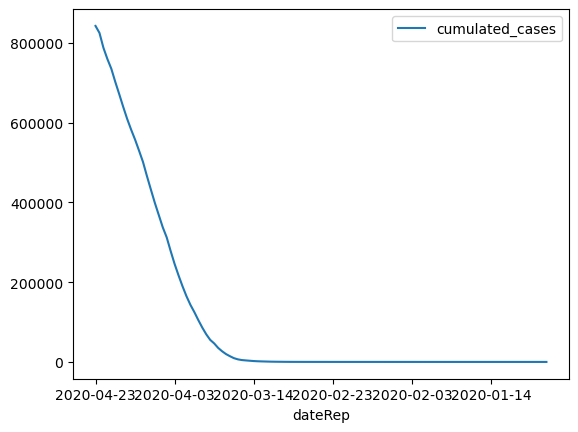

In [11]:
us_data.plot.line("dateRep","cumulated_cases")

In [12]:
us_data = us_data.sort_values("dateRep")

<Axes: xlabel='dateRep'>

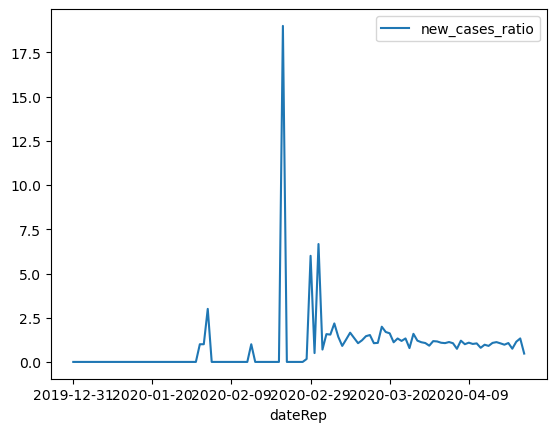

In [13]:
us_data.plot.line("dateRep","new_cases_ratio")

<Axes: xlabel='dateRep'>

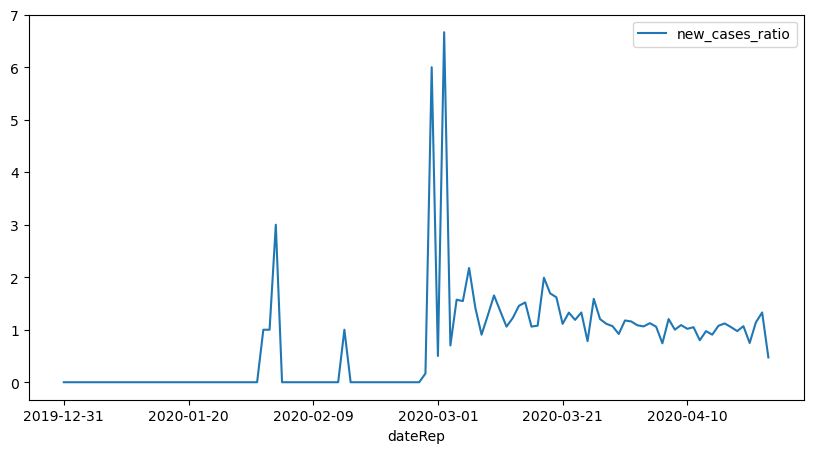

In [14]:
mask = us_data["new_cases_ratio"]<7.5
us_data[mask].plot.line(x="dateRep",y="new_cases_ratio", figsize=(10,5))

<Axes: xlabel='dateRep'>

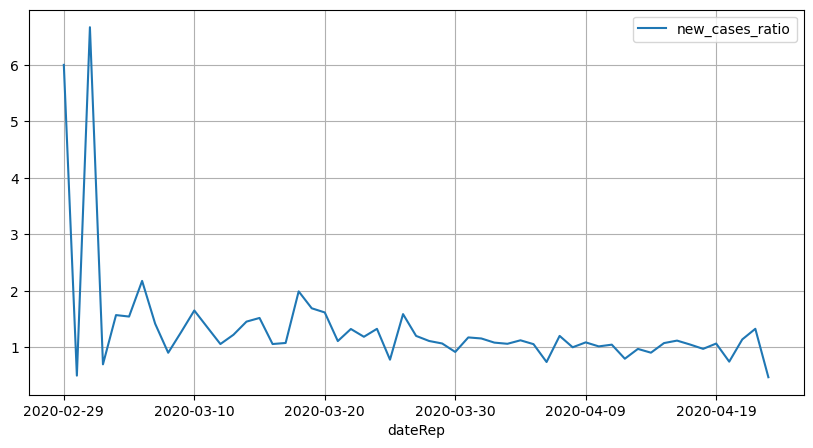

In [15]:
mask = us_data["dateRep"]>="2020-02-29"
us_data[mask].plot.line(x="dateRep",y="new_cases_ratio", figsize=(10,5), grid=True)

In [16]:
us_data.to_csv("us_data.csv")